In [28]:
import numpy as np
import matplotlib.pyplot as plt
from ds_f import *

From __Datascience from Scratch__

In [44]:
def uniform_pdf(x):
    return 1 if (x>=0 and x<1) else 0

def uniform_cdf(x):
    if x<0: return 0
    elif x<1:return x
    else: return 1
    
def normal_pdf(x,mu=0,sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu)**2/2/sigma**2))/(sqrt_two_pi*sigma)

def normal_cdf(x,mu=0,sigma=1):
    return (1+math.erf((x-mu) / math.sqrt(2) / sigma))/2

def inverse_normal_cdf(p,mu=0,sigma=1,tolerance=0.00001):
    # if not standard, compute standard and rescale
    if mu!= 0 or sigma !=1:
        return mu+sigma*inverse_normal_cdf(p,tolerance=tolerance)
    
    low_z = -10.0 #normal_cdf(-10) is ~0
    high_z = 10.0 #normal_cdf(10) is ~1
    while hi_z-low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 #eval midpoint
        mid_p = normal_cdf(mid_z)  #cdf value for midpoint
        if mid_p < p:
            # midpoint is still to low
            low_z=mid_z
        elif mid_p >p:
            # midpoint is too high
            high_z = mid_z
        else:
            break
    return mid_z

def bernoulli_trial(p):
    return 1 if np.random.random() < p else 0

def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p,n,num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x-.4 for x in histogram.keys()],
            [v/num_points for v in histogram.values()],
            .8,
            color='.75')
    mu=p*n
    sigma=math.sqrt(n*p*(1-p))
    
    xs = range(min(data),max(data)+1)
    ys= [normal_cdf(i+.5,mu,sigma) - normal_cdf(i-.5,mu,sigma) for i in xs]
    
    plt.plot(xs,ys)
    plt.title('Binomial Distribution vs Normal Approximation')
    plt.show()

In [77]:
binomial(100,.97)

95

In [26]:
xs = [x/10.0 for x in range(-50,50)]

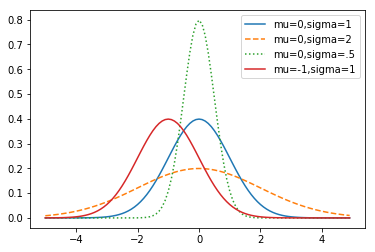

In [37]:
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=.5) for x in xs],':',label='mu=0,sigma=.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-',label='mu=-1,sigma=1')
plt.legend()
plt.show()

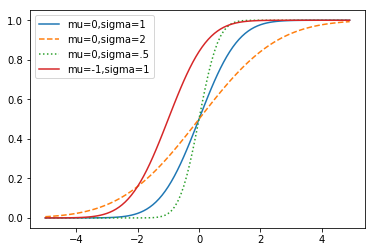

In [38]:
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=.5) for x in xs],':',label='mu=0,sigma=.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-',label='mu=-1,sigma=1')
plt.legend()
plt.show()

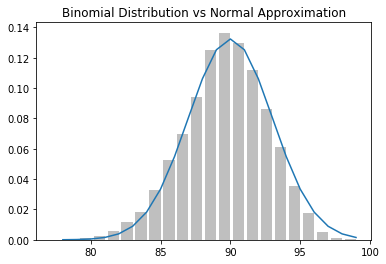

In [50]:
make_hist(.9,100,10000)

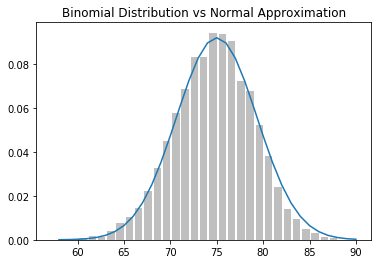

In [78]:
make_hist(.75,100,10000)

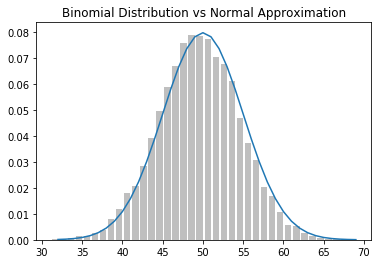

In [79]:
make_hist(.5,100,10000)